In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# THis is the function that adds a row to the summary, for every match and every failed check that appears. 
def flattening_list(list_dictionaries):
    dictionaries=[]
    for element in list_dictionaries:
        if isinstance(element,dict):
            dictionaries.append(element)
        if isinstance(element,dict)==False:
            for dictionary in element:
                dictionaries.append(dictionary)
        if element is None:
            pass
    return(dictionaries)
def add_to_summary_table( no_pago, valor_inicial, pago_capital ,intereses,valor_nuevo,pago_acumulado, pago_intereses_acum, pago_capital_acum): 
    no_pago_list=[]
    valor_inicial_list=[]
    pago_capital_list=[]
    intereses_list=[]
    valor_nuevo_list=[]
    pago_acumulado_list=[]
    pago_intereses_acum_list=[]
    pago_capital_acum_list=[]

    no_pago_list.append(no_pago)
    valor_inicial_list.append(valor_inicial)
    pago_capital_list.append(pago_capital)
    intereses_list.append(intereses)
    valor_nuevo_list.append(valor_nuevo)
    pago_acumulado_list.append(pago_acumulado)
    pago_intereses_acum_list.append(pago_intereses_acum)
    pago_capital_acum_list.append(pago_capital_acum)


    failed_checks_dict= {'periodo':no_pago_list
                         ,'saldo_inicial':valor_inicial_list
                        ,'pago_capital': pago_capital_list
                        ,'intereses':intereses_list
                        ,'saldo_final':valor_nuevo_list
                        , 'pago_acumulado':pago_acumulado_list
                        ,'pago_intereses_acum':pago_intereses_acum_list
                        ,'pago_capital_acum':pago_capital_acum_list}
    return(failed_checks_dict) #dictionary with match failed checks

def dictionaries_joining(dictionaries): #Joins the failed_df dictionaries and converts it to a dataframe.
    for num in range(0,len(dictionaries)-1):
        # print(num)
        for key in dictionaries[0]:
            if key in dictionaries[num+1]:
                for value in dictionaries[num+1][key]:
                    dictionaries[0][key] += [value]
    dict_df=dictionaries[0]#pd.DataFrame(dictionaries[0])
    return(dict_df)  

In [5]:
# no_cantidad_pago=0
# for meses in periodos_pagos:
#     pago_mensual[no_cantidad_pago]
def ciclo_amortizacion(valor_inicial, tasa, pago_mensual, meses, mes_inicial, pago_acumulado=0, pago_intereses_acum=0, pago_capital_acum=0):
#     pago_acumulado= 0
#     pago_intereses_acum=0
#     pago_capital_acum=0
    table_dict=[]
    periods=[]
#     valor_nuevo=valor_inicial
    for no_pago in range (mes_inicial,meses): # meses
        periods.append(no_pago)
        pago_acumulado+=pago_mensual
#         valor_inicial= round(valor_nuevo,2)
        intereses= round(((valor_inicial)*(tasa)),2)
        pago_intereses_acum+=intereses
        valor_c_intereses =round(valor_inicial + intereses,2)
        pago_capital= round(pago_mensual- intereses,2)
        pago_capital_acum+= pago_capital
        valor_nuevo= round(valor_c_intereses - pago_mensual,2)
        table_dict.append(add_to_summary_table(no_pago, valor_inicial, pago_capital ,intereses,valor_nuevo,pago_acumulado, pago_intereses_acum, pago_capital_acum))
        valor_inicial= round(valor_nuevo,2)
        if valor_nuevo<=0:
            print('Pago terminado en periodo ',no_pago/12 )
            amortizacion_df=pd.DataFrame(dictionaries_joining(table_dict))
            amortizacion_df.loc[:,'eficiencia']=amortizacion_df['pago_capital']/(amortizacion_df['pago_capital']+amortizacion_df['intereses'])
            return(amortizacion_df,periods)
#         elif no_pago==meses:
    print('Periodo de pago: ',no_pago/12 )
    amortizacion_df=pd.DataFrame(dictionaries_joining(table_dict))
    amortizacion_df.loc[:,'eficiencia']=amortizacion_df['pago_capital']/(amortizacion_df['pago_capital']+amortizacion_df['intereses'])
    return(amortizacion_df,periods)
            

In [6]:
tasa_equivalente_anual= .1010 #.85 # para lo del TEC
tasa_equivalente_mensual = ((1+tasa_equivalente_anual)**(1/12))-1
tasa_equivalente_mensual

0.008050470307310986

In [7]:
valor_inicial= 410332
tasa=tasa_equivalente_mensual 
pago_mensual= 5200+6000#+1200#*2#4734*2
pagos_extras = 350
seguros= 0
meses=12*19

In [8]:
amortizacion_df, periods = ciclo_amortizacion(valor_inicial, tasa, pago_mensual,meses,1)

Pago terminado en periodo  3.6666666666666665


In [9]:

amortizacion_df

,periodo,saldo_inicial,pago_capital,intereses,saldo_final,pago_acumulado,pago_intereses_acum,pago_capital_acum,eficiencia
0,1,410332.00,7896.63,3303.37,402435.37,11200,3303.37,7896.63,0.705056
1,2,402435.37,7960.21,3239.79,394475.16,22400,6543.16,15856.84,0.710733
2,3,394475.16,8024.29,3175.71,386450.87,33600,9718.87,23881.13,0.716454
3,4,386450.87,8088.89,3111.11,378361.98,44800,12829.98,31970.02,0.722222
4,5,378361.98,8154.01,3045.99,370207.97,56000,15875.97,40124.03,0.728037
5,6,370207.97,8219.65,2980.35,361988.32,67200,18856.32,48343.68,0.733897
6,7,361988.32,8285.82,2914.18,353702.50,78400,21770.50,56629.50,0.739805
7,8,353702.50,8352.53,2847.47,345349.97,89600,24617.97,64982.03,0.745762
8,9,345349.97,8419.77,2780.23,336930.20,100800,27398.20,73401.80,0.751765
9,10,336930.20,8487.55,2712.45,328442.65,112000,30110.65,81889.35,0.757817


### Eficiencia total de amortización

In [10]:
def eficiencia_total(amortizacion_df):
    pago_capital_final= amortizacion_df['pago_capital_acum'].iloc[-1]+amortizacion_df['saldo_final'].iloc[-1]
    eficiencia=pago_capital_final/(pago_capital_final+amortizacion_df['pago_intereses_acum'].iloc[-1])
    print('Pago a capital:   ',round(pago_capital_final,2))
    print('Pago a intereses: ',round(amortizacion_df['pago_intereses_acum'].iloc[-1],2))
    print('                 -------------------------------------------')
    print('Pago total:       ',round(pago_capital_final+amortizacion_df['pago_intereses_acum'].iloc[-1],2))
    print('Eficiencia total', round(eficiencia,4))
    return(eficiencia)

eficiencia_total(amortizacion_df)

Pago a capital:    410332.0
Pago a intereses:  77834.02
                 -------------------------------------------
Pago total:        488166.02
Eficiencia total 0.8406


0.8405583002274513

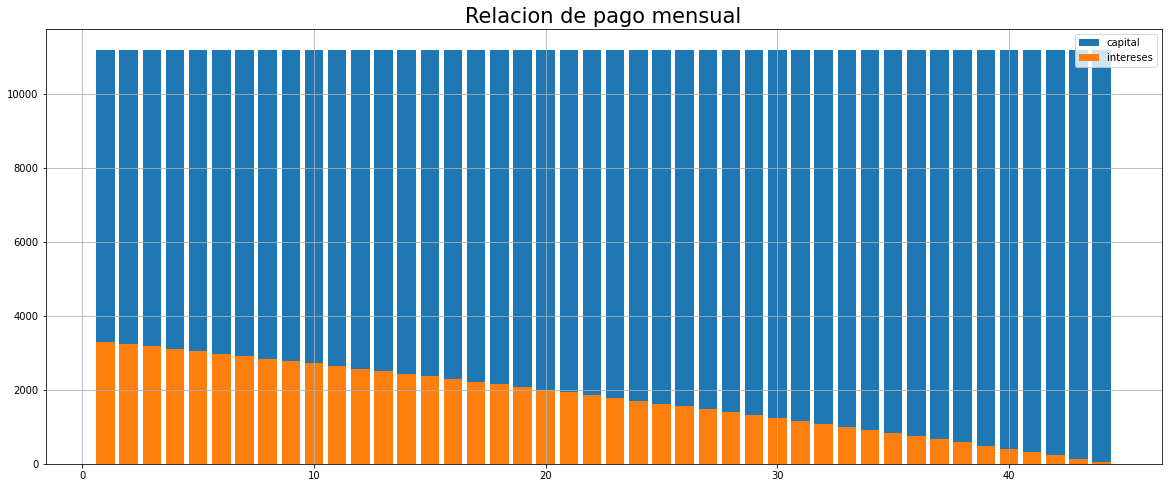

In [11]:
def grafica_eficiencia_mensual(periods, amortizacion_df):
    fig, ax = plt.subplots(figsize=(20,8))

    
    ax.bar(periods, amortizacion_df['pago_capital'], bottom=amortizacion_df['intereses'], label='capital')
    ax.bar(periods, amortizacion_df['intereses'], label='intereses')

    ax.set_title('Relacion de pago mensual', fontsize=21)
    ax.grid()
    ax.legend()
grafica_eficiencia_mensual(periods, amortizacion_df)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

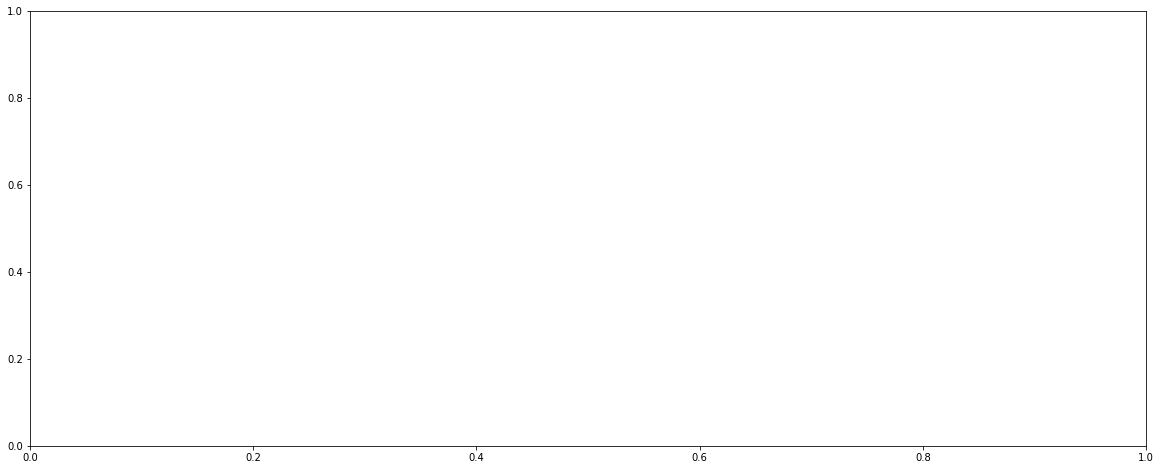

In [185]:
def grafica_pago_acumulado(periods, amortizacion_df):
    fig, ax = plt.subplots(figsize=(20,8))
    ax.bar(periods, amortizacion_df['pago_capital_acum'],bottom= amortizacion_df['pago_intereses_acum'],label='Loan principal')
    ax.bar(periods, amortizacion_df['pago_intereses_acum'], label='Interests')

    ax2= ax.twinx()
    ax2.plot(amortizacion_df['eficiencia'],'g.-', label='efficiency')


    ax.set_title('Accumulated mortgage payment', fontsize=22)
    ax.set_ylabel('Payment [$]', fontsize=20)
    ax.set_xlabel('Months', fontsize=20)
    ax2.set_ylabel('Efficiency of payment', fontsize=20)
    ax.legend(fontsize=18)
    ax2.legend(fontsize=18)
    ax.grid()
    ax2.set_ylim(0,1.2)
    plt.tight_layout()
    plt.savefig('morgage_payment.png')

    
grafica_pago_acumulado(periods, amortizacion_df)

# Con pago variable 

In [93]:
# valor_inicial=115803.71#+817.55#-2186.68
# tasa=.006950
# pago_mensual_list=[500,3004.23]
# periodos_pagos=[6,60]
# # años=13
# # for i in range(13*12):
# #     periodos_pagos.append(i)
# seguros= 0
valor_inicial= 410332
tasa=tasa_equivalente_mensual 
pago_mensual_list=[4800+6000,4800]#+6000#+1200#*2#4734*2
periodos_pagos=[12*3,12*8]
# for i in range(13*12):
#     periodos_pagos.append(i)
pagos_extras = 350
seguros= 0
meses=12*13

In [94]:
no_cantidad_pago=0
df_periodos=[]
periodos=[]
mes_inicial=1
pago_acumulado=0
pago_intereses_acum=0
pago_capital_acum=0
for meses in periodos_pagos:
    pago_mensual = pago_mensual_list[no_cantidad_pago]
    no_cantidad_pago+=1
    print(no_cantidad_pago)
    print(pago_acumulado)
    df, periods=ciclo_amortizacion(valor_inicial, tasa, pago_mensual, meses+1,mes_inicial, pago_acumulado, pago_intereses_acum, pago_capital_acum )
    df_periodos.append(df)
    periodos.append(periods)
    pago_acumulado=df['pago_acumulado'].iloc[-1]
    pago_intereses_acum=df['pago_intereses_acum'].iloc[-1]
    pago_capital_acum=df['pago_capital_acum'].iloc[-1]
    mes_inicial= periods[-1]+1
    valor_inicial =df_periodos[0].iloc[-1]['saldo_final']
df_meses_diferentes=pd.concat(df_periodos)
df_meses_diferentes.reset_index(inplace=True)

1
0
Periodo de pago:  3.0
2
388800
Pago terminado en periodo  5.333333333333333


In [95]:
df_meses_diferentes=pd.concat(df_periodos)
df_meses_diferentes.reset_index(inplace=True)

In [96]:
df_meses_diferentes

,index,periodo,saldo_inicial,pago_capital,intereses,saldo_final,pago_acumulado,pago_intereses_acum,pago_capital_acum,eficiencia
0,0,1,410332.00,6906.44,3893.56,403425.56,10800,3893.56,6906.44,0.639485
1,1,2,403425.56,6971.98,3828.02,396453.58,21600,7721.58,13878.42,0.645554
2,2,3,396453.58,7038.13,3761.87,389415.45,32400,11483.45,20916.55,0.651679
3,3,4,389415.45,7104.92,3695.08,382310.53,43200,15178.53,28021.47,0.657863
4,4,5,382310.53,7172.33,3627.67,375138.20,54000,18806.20,35193.80,0.664105
...,...,...,...,...,...,...,...,...,...,...
59,23,60,20924.35,4601.45,198.55,16322.90,504000,109990.90,394009.10,0.958635
60,24,61,16322.90,4645.12,154.88,11677.78,508800,110145.78,398654.22,0.967733
61,25,62,11677.78,4689.19,110.81,6988.59,513600,110256.59,403343.41,0.976915
62,26,63,6988.59,4733.69,66.31,2254.90,518400,110322.90,408077.10,0.986185


In [97]:
import itertools
periods=list(itertools.chain.from_iterable(periodos))

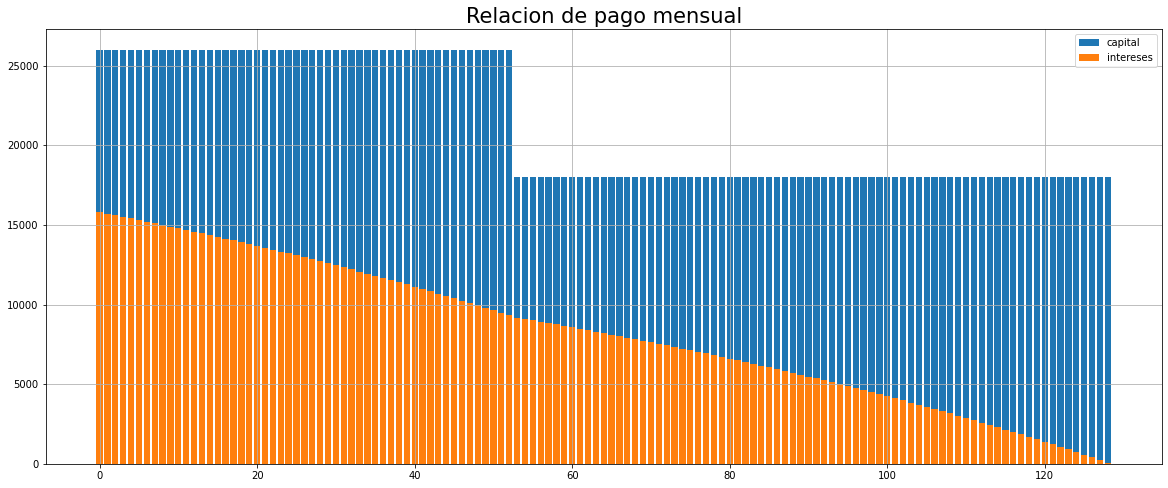

In [120]:
grafica_eficiencia_mensual(periods, df_meses_diferentes)

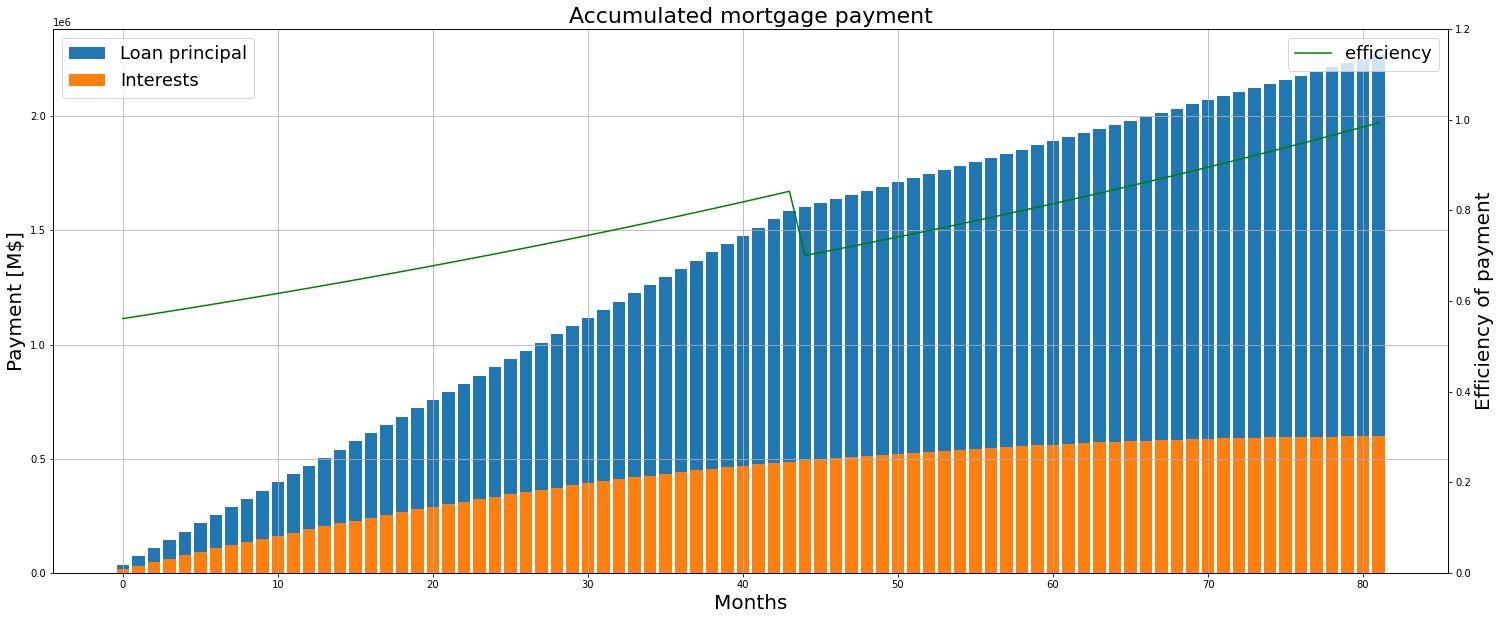

In [150]:
grafica_pago_acumulado(periods, df_meses_diferentes)

In [100]:
eficiencia_total(df_meses_diferentes)

Pago a capital:    410332.0
Pago a intereses:  110344.3
                 -------------------------------------------
Pago total:        520676.3
Eficiencia total 0.7881


0.7880750477792056

# Con eficiencia fija

In [101]:
valor_inicial=410332#115803.71#+817.55#-2186.68
tasa=.006950
pago_mensual_list=[500,3004.23]
periodos_pagos=[6,60]
años=13
# for i in range(20*12):
#     periodos_pagos.append(i)
seguros= 0

In [102]:
no_cantidad_pago=0
df_periodos=[]
periodos=[]
mes_inicial=1
for meses in periodos_pagos:
    pago_mensual = pago_mensual_list[no_cantidad_pago]
    no_cantidad_pago+=1
    print(no_cantidad_pago)
    df, periods=ciclo_amortizacion(valor_inicial, tasa, pago_mensual, meses+1,mes_inicial )
    df_periodos.append(df)
    periodos.append(periods)
    mes_inicial= periods[-1]+1
    valor_inicial =df_periodos[0].iloc[-1]['saldo_final']

1
Periodo de pago:  0.5
2
Periodo de pago:  5.0


## Fórmula que tal vez puede sustituir al ciclo de amortización simple

In [103]:
valor_inicial= 410332
tasa=tasa_equivalente_mensual 
pago_mensual= 4734#+6000#+1200#*2#4734*2
pagos_extras = 350
seguros= 0
meses=12*13

In [104]:
eficiencia=.836
# valor_final= valor_inicial*((1-(1/eficiencia)+tasa)/(1-(1/eficiencia)))
# valor_inicial-valor_final
def amortizacion_con_eficiencia_fija(valor_inicial, tasa, meses, eficiencia, pago_minimo):
    pago_acumulado=0
    pago_intereses_acum=0
    pago_capital_acum=0
    table_dict=[]
    periods=[]
    for no_pago in range(meses):
        periods.append(no_pago)
        valor_nuevo= round(valor_inicial*((-1+(1/eficiencia)-tasa)/(-1+(1/eficiencia))),2)
        pago_capital= round(valor_inicial-valor_nuevo,2)
        intereses= round(valor_inicial* tasa,2)
        pago_total=round(pago_capital+intereses,2)
        pago_acumulado+=(pago_total)
        pago_capital_acum+=pago_capital
        pago_intereses_acum+=intereses
        valor_inicial=round(valor_nuevo,2)
        table_dict.append(add_to_summary_table(no_pago, valor_inicial, pago_capital ,intereses,valor_nuevo,pago_acumulado, pago_intereses_acum, pago_capital_acum))

        if pago_total<=pago_minimo:
            print('Pago terminado en año ',no_pago/12 )
            amortizacion_eficiencia_fija=pd.DataFrame(dictionaries_joining(table_dict))
            amortizacion_eficiencia_fija.loc[:,'eficiencia']=amortizacion_eficiencia_fija['pago_capital']/(amortizacion_eficiencia_fija['pago_capital']+amortizacion_eficiencia_fija['intereses'])
            return(amortizacion_eficiencia_fija, periods, no_pago)

tabla_etha_fija, periods, no_pago = amortizacion_con_eficiencia_fija(valor_inicial, tasa, meses, eficiencia, pago_mensual)
tabla_etha_fija

Pago terminado en año  2.75


,periodo,saldo_inicial,pago_capital,intereses,saldo_final,pago_acumulado,pago_intereses_acum,pago_capital_acum,eficiencia
0,0,390484.36,19847.64,3893.56,390484.36,23741.20,3893.56,19847.64,0.836000
1,1,371596.75,18887.61,3705.23,371596.75,46334.04,7598.79,38735.25,0.836000
2,2,353622.73,17974.02,3526.00,353622.73,67834.06,11124.79,56709.27,0.836000
3,3,336518.10,17104.63,3355.45,336518.10,88294.14,14480.24,73813.90,0.836000
4,4,320240.82,16277.28,3193.15,320240.82,107764.57,17673.39,90091.18,0.836000
5,5,304750.87,15489.95,3038.70,304750.87,126293.22,20712.09,105581.13,0.836000
6,6,290010.16,14740.71,2891.72,290010.16,143925.65,23603.81,120321.84,0.836000
7,7,275982.46,14027.70,2751.85,275982.46,160705.20,26355.66,134349.54,0.836000
8,8,262633.27,13349.19,2618.74,262633.27,176673.13,28974.40,147698.73,0.836000
9,9,249929.78,12703.49,2492.07,249929.78,191868.69,31466.47,160402.22,0.836000


In [105]:
amortizacion_eficiencia_fija, periods, no_pago=amortizacion_con_eficiencia_fija(valor_inicial, tasa, meses, eficiencia, pago_minimo)

Pago terminado en año  0.5


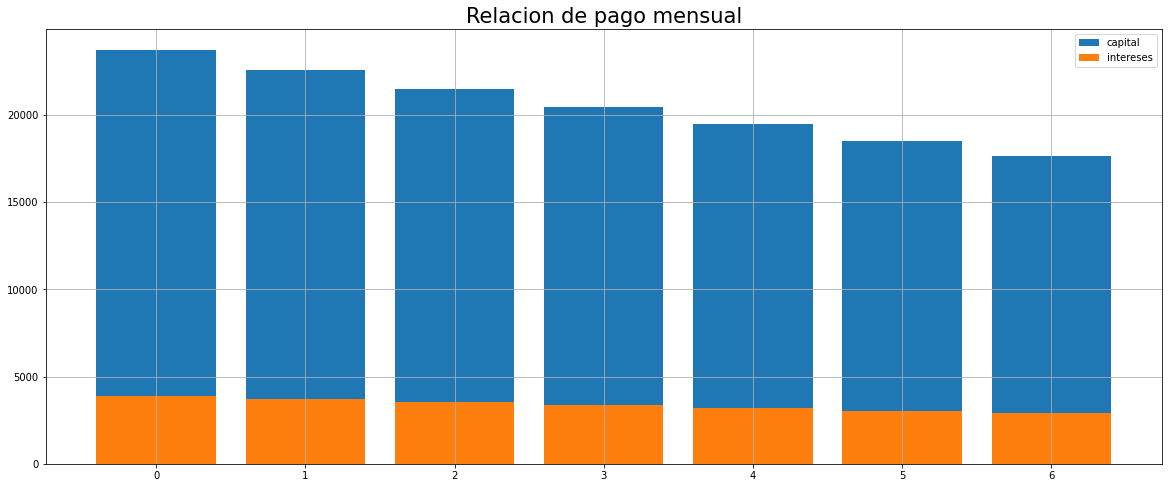

In [106]:
grafica_eficiencia_mensual(periods, amortizacion_eficiencia_fija)

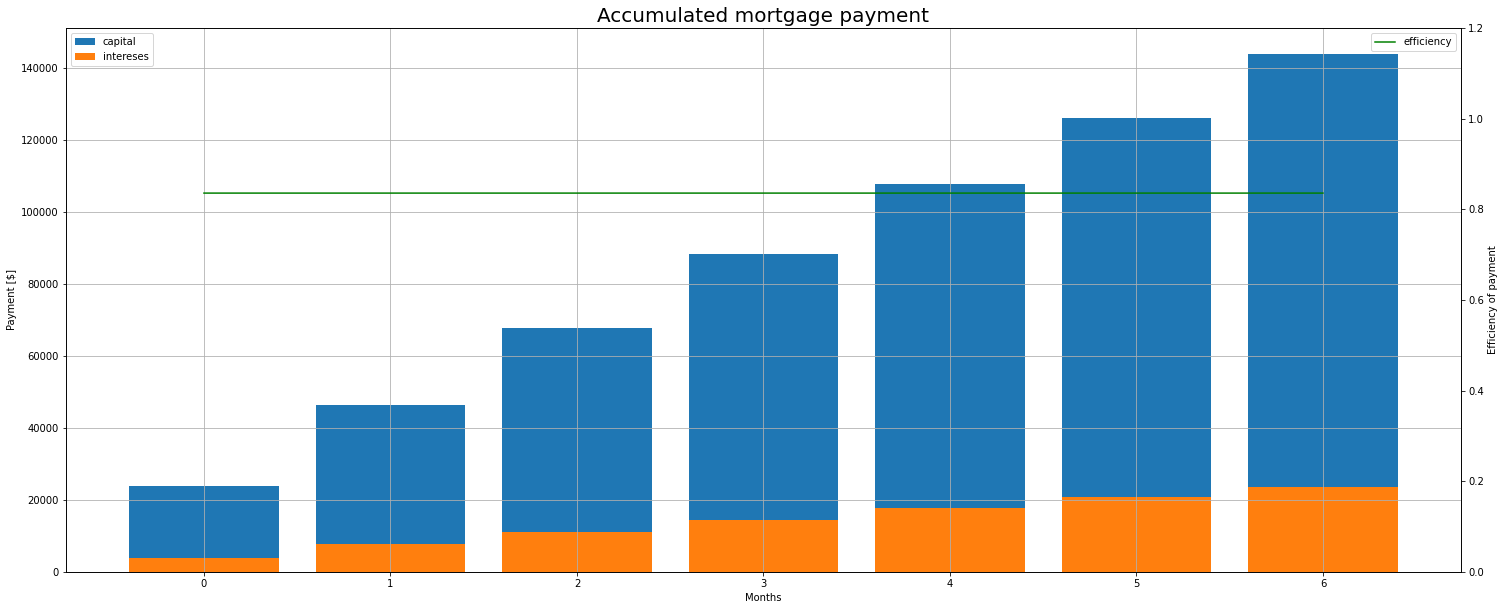

In [107]:
grafica_pago_acumulado(periods, amortizacion_eficiencia_fija)

# Calculadora tiempo conveniente para pagar máximo que se puede

In [165]:
# tasa_equivalente_anual= .1010 #.85 # para lo del TEC
# valor_inicial= 410332
# pago_mensual_maximo= 5200+6000 # Irma, Casa, vales, mínimo
# pago_minimo =5200# pago_mensual_maximo#6000#10000
# pagos_extras = 350
# seguros= 0
# meses=12*19
tasa_equivalente_anual= .12 #.85 # para lo del TEC
valor_inicial= (3650000*.9)/20
pago_mensual_maximo= (72000)/20 # Irma, Casa, vales, mínimo
pago_minimo =(36000)/20# pago_mensual_maximo#6000#10000
pagos_extras = 0
seguros= 0
meses=12*20

In [166]:
tasa_equivalente_mensual = ((1+tasa_equivalente_anual)**(1/12))-1
tasa=tasa_equivalente_mensual 
df_amortizacion_simple, periods = ciclo_amortizacion(valor_inicial, tasa, pago_mensual_maximo,meses,1)
eficiencia_pagando_maximo= eficiencia_total(df_amortizacion_simple)

Pago terminado en periodo  5.083333333333333
Pago a capital:    164250.0
Pago a intereses:  51988.31
                 -------------------------------------------
Pago total:        216238.31
Eficiencia total 0.7596


In [167]:
df_eficiencia_fija, periodos, no_pago_eficiencia_fija= amortizacion_con_eficiencia_fija(valor_inicial, tasa, meses, eficiencia_pagando_maximo, pago_minimo )

# print('Tiempo pagando con eficiencia fija para llegar a mínimo ')
# eficiencia_total(df_eficiencia_fija)

Pago terminado en año  3.5833333333333335


In [168]:
pago_mensual_list=[pago_mensual_maximo,pago_minimo]#+6000#+1200#*2#4734*2
periodos_pagos=[no_pago_eficiencia_fija,meses]


In [169]:
no_cantidad_pago=0
df_periodos=[]
periodos=[]
mes_inicial=0
pago_acumulado=0
pago_intereses_acum=0
pago_capital_acum=0
for meses in periodos_pagos:
    pago_mensual = pago_mensual_list[no_cantidad_pago]
    no_cantidad_pago+=1
    print(no_cantidad_pago)
    print(pago_acumulado)
    df, periods=ciclo_amortizacion(valor_inicial, tasa, pago_mensual, meses+1,mes_inicial, pago_acumulado, pago_intereses_acum, pago_capital_acum )
    df_periodos.append(df)
    periodos.append(periods)
    pago_acumulado=df['pago_acumulado'].iloc[-1]
    pago_intereses_acum=df['pago_intereses_acum'].iloc[-1]
    pago_capital_acum=df['pago_capital_acum'].iloc[-1]
    mes_inicial= periods[-1]+1
    valor_inicial =df_periodos[0].iloc[-1]['saldo_final']
    periods=list(itertools.chain.from_iterable(periodos))
df_meses_diferentes=pd.concat(df_periodos)
df_meses_diferentes.reset_index(inplace=True)

1
0
Periodo de pago:  3.5833333333333335
2
158400.0
Pago terminado en periodo  6.583333333333333


In [170]:
# amortizacion_df, periods = ciclo_amortizacion(valor_inicial, tasa, pago_mensual_maximo,meses,1)
print('Pagos y eficiencia siempre pagando máximo:')
eficiencia_pagando_maximo = eficiencia_total(df_amortizacion_simple)
print('Pagos y eficiencia con metodo ')
eficiencia_total(df_meses_diferentes)


Pagos y eficiencia siempre pagando máximo:
Pago a capital:    164250.0
Pago a intereses:  51988.31
                 -------------------------------------------
Pago total:        216238.31
Eficiencia total 0.7596
Pagos y eficiencia con metodo 
Pago a capital:    164250.0
Pago a intereses:  57173.75
                 -------------------------------------------
Pago total:        221423.75
Eficiencia total 0.7418


0.7417903454349409

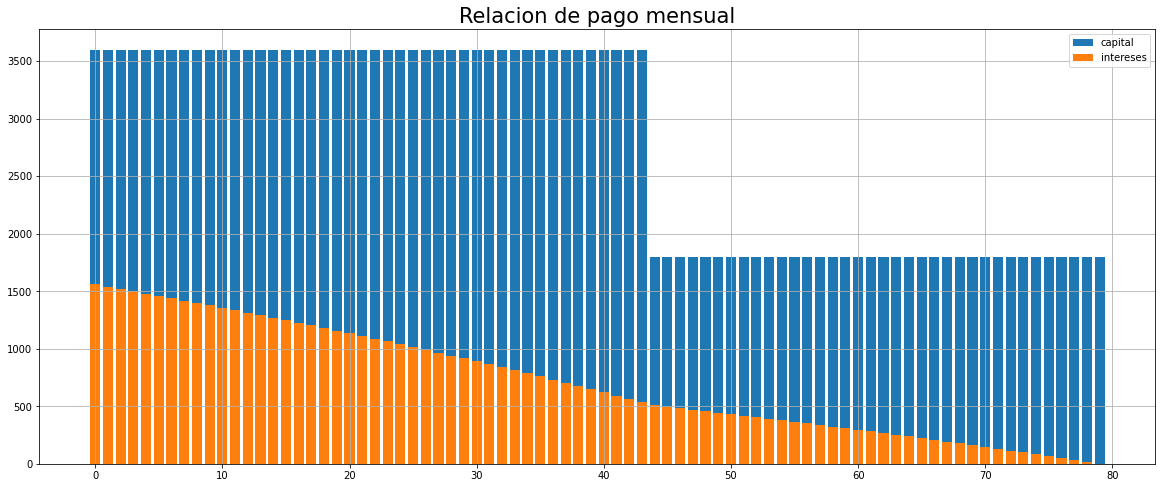

In [171]:
grafica_eficiencia_mensual(periods,df_meses_diferentes)

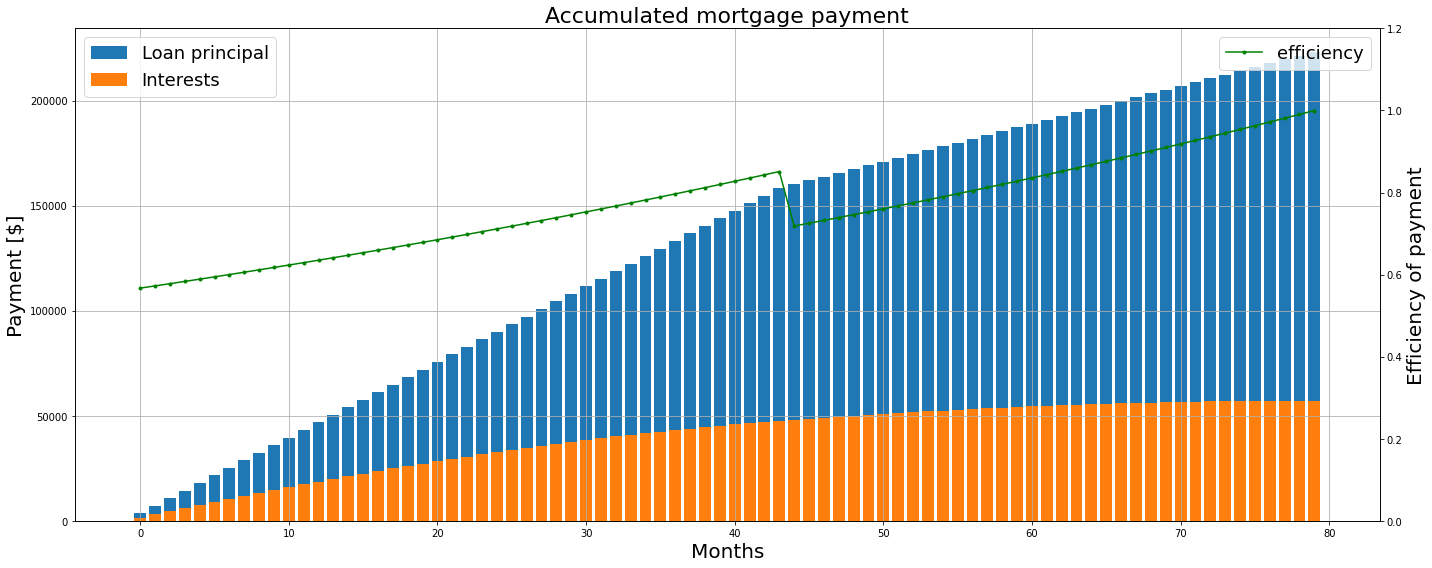

In [186]:
grafica_pago_acumulado(periods, df_meses_diferentes)

In [173]:
df_meses_diferentes

,index,periodo,saldo_inicial,pago_capital,intereses,saldo_final,pago_acumulado,pago_intereses_acum,pago_capital_acum,eficiencia
0,0,0,164250.00,2041.47,1558.53,162208.53,3600.0,1558.53,2041.47,0.567075
1,1,1,162208.53,2060.84,1539.16,160147.69,7200.0,3097.69,4102.31,0.572456
2,2,2,160147.69,2080.39,1519.61,158067.30,10800.0,4617.30,6182.70,0.577886
3,3,3,158067.30,2100.13,1499.87,155967.17,14400.0,6117.17,8282.83,0.583369
4,4,4,155967.17,2120.06,1479.94,153847.11,18000.0,7597.11,10402.89,0.588906
...,...,...,...,...,...,...,...,...,...,...
75,31,75,7055.05,1733.06,66.94,5321.99,216000.0,57071.99,158928.01,0.962811
76,32,76,5321.99,1749.50,50.50,3572.49,217800.0,57122.49,160677.51,0.971944
77,33,77,3572.49,1766.10,33.90,1806.39,219600.0,57156.39,162443.61,0.981167
78,34,78,1806.39,1782.86,17.14,23.53,221400.0,57173.53,164226.47,0.990478


In [174]:
df_meses_diferentes.to_csv('pago_60k_45k_Irma.csv', index=False)

<AxesSubplot:>

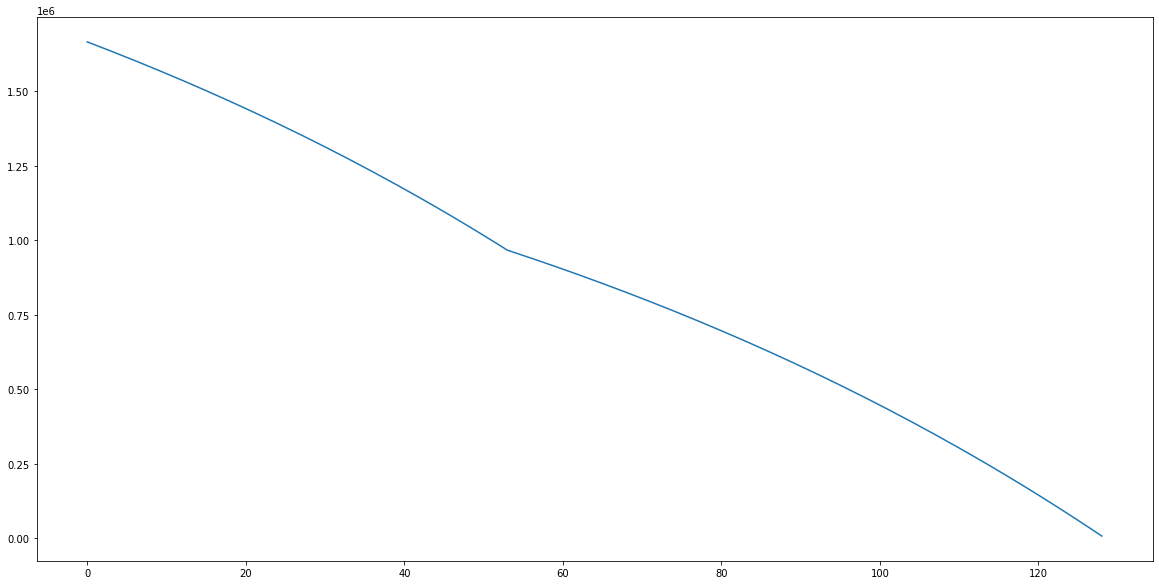

In [118]:
fig, ax = plt.subplots(figsize=(20,10))
df_meses_diferentes.saldo_inicial.plot()